In [5]:
import numpy as np
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

# Load preprocessed dataset
data = np.load("../model_training/processed_data.npz", allow_pickle=True)
X_train, X_val = data["X_train"], data["X_val"]
y_train, y_val = data["y_train"], data["y_val"]
class_names = data["class_names"]

# Print shape
print(f"Train data shape: {X_train.shape}, Validation data shape: {X_val.shape}")
print(f"Classes: {class_names}")

Train data shape: (6404, 128, 128, 3), Validation data shape: (1601, 128, 128, 3)
Classes: ['cats' 'dogs']


In [6]:
# Define the model using Input layer
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Define input shape with the Input layer
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(len(class_names), activation="softmax")
])

# Compile model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 31s 148ms/step - accuracy: 0.5453 - loss: 0.8050 - val_accuracy: 0.6864 - val_loss: 0.6152
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 29s 144ms/step - accuracy: 0.7026 - loss: 0.5630 - val_accuracy: 0.7021 - val_loss: 0.5937
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 30s 148ms/step - accuracy: 0.7901 - loss: 0.4520 - val_accuracy: 0.7233 - val_loss: 0.5734
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 29s 146ms/step - accuracy: 0.8583 - loss: 0.3272 - val_accuracy: 0.7433 - val_loss: 0.6293
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.9266 - loss: 0.2017 - val_accuracy: 0.7158 - val_loss: 0.8170
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.9646 - loss: 0.1066 - val_accuracy: 0.7358 - val_loss: 0.9086
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.9858 - loss: 0.0506 - val_accuracy: 0.7333 - val_loss: 1.1139
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 31s 156ms/step - accuracy: 0.9950 - loss: 0

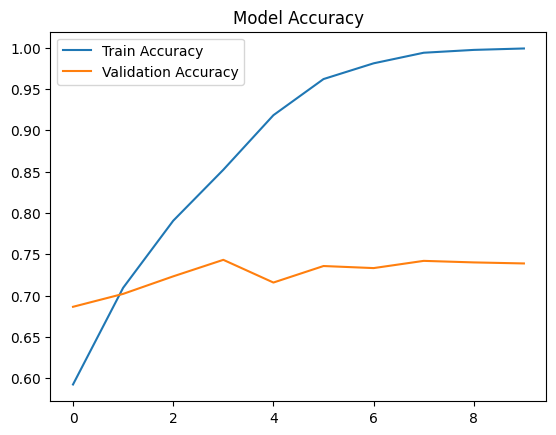

In [8]:
# Plot training history
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

In [9]:
# Save trained model
model.save("../model/model.h5")
print("Model saved successfully!")

Model saved successfully!
